## Importing the standard libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import random
%matplotlib inline

## Print function for plotting the error vs iteration number

In [48]:
def plot_err(error_list):
    plt.plot(error_list)

### Defining the training dataset for 'T' and 'J'. 
T has been assigned class '1' and J has been assigned class '0'

In [49]:
def get_inputs(): 
    # T - 1; J - 0

    datarr = []
    # Creating unrolled inputs
    datarr.append(np.array([1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0]))
    datarr.append(np.array([0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0]))
    datarr.append(np.array([1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0]))
    datarr.append(np.array([0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0]))

    datarr.append(np.array([0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0]))
    datarr.append(np.array([0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1]))
    datarr.append(np.array([1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0]))
    datarr.append(np.array([0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,1]))
    
    targets = np.array([1,1,1,1,0,0,0,0])
    
    
    return datarr,targets

Creating the training data

In [50]:
X_set,target_set = get_inputs()

In [51]:
# Drawing input as a 4x4 grid
def draw_input(X): 
    plt.matshow(X);
    plt.colorbar()
    plt.show()

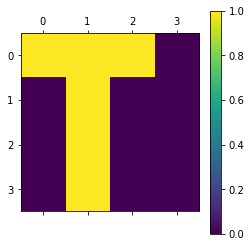

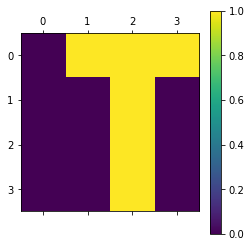

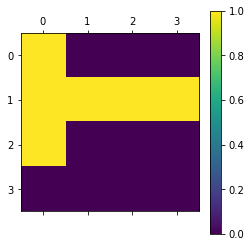

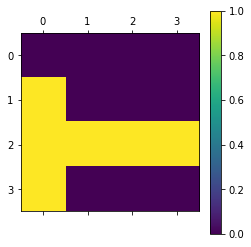

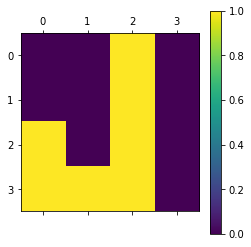

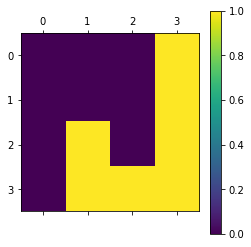

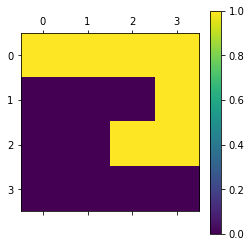

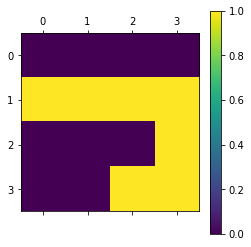

In [52]:
# Viewing all inputs
for i in X_set:
    draw_input(i.reshape(4,4))

## Defining a class 'Neuron' to model the Adaptive Linear Neuron functioning

In [53]:
class Neuron:
    
    def __init__(self,w,b): #Initializing the neuron with the provided weights and bias
        self.weights = w
        self.bias = b
        self.alpha = 0.1 #Pre-defined learning rate
    
    def get_a(self,X): #Returns the activation for a single input
        w_T = (self.weights).transpose()
        return w_T.dot(X) + self.bias
    
    def get_lmse(self,X,target): #Returns the error for the given input
        a = self.get_a(X)
        return float(target - a)
    
    def update_weights_single(self,X,target): #Updates the weights according to the input provided (Case 1)
        e = self.get_lmse(X,target)
        self.weights += 2.0*self.alpha*e*X #Equations taken from Hagen's book on Neural Network Architectures
        self.bias += 2.0*self.alpha*e  
    
    def update_weights_batch(self,dotprod_mean,error_mean): #Updates the weights according to the dotproduct (Case 2)
        self.weights += 2.0*self.alpha*dotprod_mean #Equations taken from the internet
        self.bias += 2.0*self.alpha*error_mean 
        
    def printwb(self): #Prints weights and bias
            np.set_printoptions(suppress=True,precision=4)
            print("Weights are: ",self.weights)
            print("Bias is: %.4f " % self.bias)

            

Test the behaviour of a trained neuron

In [54]:
#Function to test the performance of the given neuron. This function randomly chooses 2 out of the 8 inputs and predicts the class of the input
#Function also prints the chosen input a a 4x4 grid
def test_neuron(neuron,rand_list):
    for i in rand_list:
        a = neuron.get_a(X_set[i])
        if a > 0.5:
            draw_input(X_set[i].reshape((4,4)))
            print("Neuron guesses T with a = %.2f" % abs(a))
        else:
            draw_input(X_set[i].reshape((4,4)))
            print("Neuron guesses J with a = %.2f" % abs(a))

## Adaline function for the first case 1, i.e. updating the weights after each input is given. 

In [55]:
def adaline_single(X_set,target_set):
    error_list = []
    error = np.inf
    w = np.array([0]*16,dtype = float) #Initializing all weights to 0
    b = 2.0 #Initializing the bias to 2
    
    threshold = 0.0000001   #Pre-defined threshold to check for convergence
    
    cond = error >= threshold  #Condition for exiting the loop. 1.e. If the error is less than the threshold, the loop stops
    neuron = Neuron(w,b)
    dataset = list(zip(X_set,target_set))
    rnd.shuffle(dataset) #Shuffling the dataset to remove the possibility of sequential bias
    X_set,target_set = zip(*dataset)
    while cond:    #Starts the learning loop
        
        for X,target in zip(X_set,target_set):  #Inner loop runs through all the 8 datapoints
            
            error = neuron.get_lmse(X,target)
            neuron.update_weights_single(X,target)
            error_list.append(abs(error))
            cond = abs(error) >= threshold
            
            if cond:
                continue
            else:
                break
                
    return neuron,error_list
    
                


## Plotting the graph for the first adaline function (Case 1)

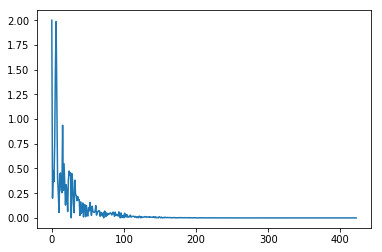

In [56]:
neuron_single, error_single = adaline_single(X_set,target_set) #Training the model
plot_err(error_single)

Testing the neuron

Weights are:  [-0.1882  0.0945 -0.4271  0.1373  0.1167 -0.0801 -0.0487 -0.5316 -0.0185
  0.2935 -0.2302 -0.6051 -0.3068 -0.4429 -0.2762 -0.3255]
Bias is: 1.7504 


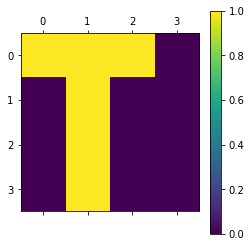

Neuron guesses T with a = 1.00


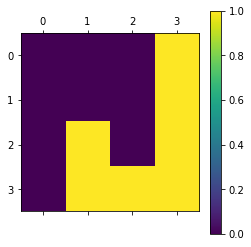

Neuron guesses J with a = 0.00


In [57]:
neuron_single.printwb()  
rand_list = random.sample(range(0, len(X_set)),2)
test_neuron(neuron_single,rand_list)

## Adaline function for the second case 2, i.e. updating the weights after each iteration is given. 

In [58]:
def adaline_batch(X_set,target_set):
    error_list = []
    error = np.inf
    w = np.array([0]*16,dtype = float) #Initializing the weights to 0
    b = 2.0 #Initializing the bias to 2
    
    threshold = 0.0000001  #Pre-defined threshold
    
    cond = error >= threshold
    neuron = Neuron(w,b)
    dataset = list(zip(X_set,target_set))
    rnd.shuffle(dataset)  #Shuffling the dataset
    X_set,target_set = zip(*dataset)
    i = 0
    while cond: #Each iteration consides the full batch of 8 datapoints before updating the weights
        dotprod_itr = []
        error_itr = []
        for X,target in zip(X_set,target_set): #Storing the dotproduct of each datapoint
            e = neuron.get_lmse(X,target)
            dotprod_itr.append(e*X)
            error_itr.append(e)
        
        dotprod_mean = np.mean(dotprod_itr) #Calculating the mean
        error_mean = np.mean(error_itr)
        
        error_list.append(abs(error_mean))
        
        neuron.update_weights_batch(dotprod_mean,error_mean)  #Updating the weights
        
        cond = abs(error_mean) >= threshold
                
    return neuron,error_list

## Plotting the graph for the second adaline function (Case 2)

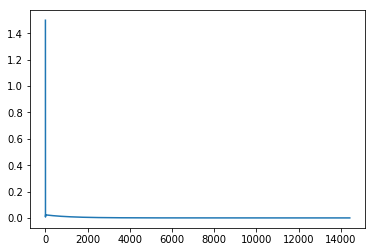

In [59]:
neuron_batch, error_batch = adaline_batch(X_set,target_set)
plot_err(error_batch)

Testing the neuron

Weights are:  [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Bias is: 7.0000 


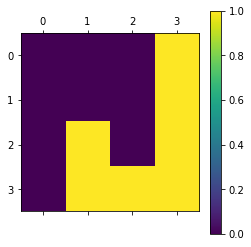

Neuron guesses J with a = 0.00


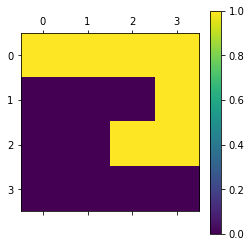

Neuron guesses J with a = 0.00


In [60]:
neuron_batch.printwb()
rand_list = random.sample(range(0, len(X_set)),2)
test_neuron(neuron_batch,rand_list)

## Combining the two Adaline models to run the first model for the first 6 inputs of the shuffled dataset and runs the second model for the batch of the remaining 2 inputs

In [61]:
def adaline_combo(X_set,target_set):
    
    error_list = []
    error = np.inf
    w = np.array([0]*16,dtype = float)   #Initializing the weights to 0
    b = 2.0 #Initializing the bias to 2
    
    threshold = 0.0000001 #Pre-defined threshold
    
    cond = error >= threshold
    neuron = Neuron(w,b)
    dataset = list(zip(X_set,target_set))
    rnd.shuffle(dataset) #Shuffling the dataset
    X_set,target_set = zip(*dataset)
    while cond:
        
        
        for X,target in zip(X_set[:6],target_set[:6]):  #Running the first model for the first 6 inputs

            error = neuron.get_lmse(X,target)
            neuron.update_weights_single(X,target)
            error_list.append(abs(error))
            cond = abs(error) >= threshold  

            if cond:   #Stopping the algorithm if threshold is reached
                continue
            else:
                break
        
        if cond:        #Running the second model for the remaining two inputs
            dotprod_itr = []
            error_itr = []
            for X,target in zip(X_set[6:],target_set[6:]):
                e = neuron.get_lmse(X,target)
                dotprod_itr.append(e*X) 
                error_itr.append(e)

            dotprod_mean = np.mean(dotprod_itr)
            error_mean = np.mean(error_itr)

            error_list.append(abs(error_mean))

            neuron.update_weights_batch(dotprod_mean,error_mean) 

            cond = abs(error_mean) >= threshold
            
        else:
            break
                
    return neuron,error_list
        

Plotting the combination graph of adaline 1 and 2 ( Case 1 and 2 combined) 

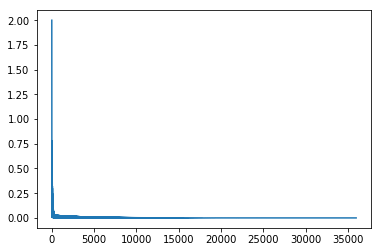

In [62]:
neuron_combo,error_combo = adaline_combo(X_set,target_set)
plot_err(error_combo)

Testing the neuron

Weights are:  [-0.9999 -0.9999 -0.9999 -0.9998 -0.9999 -0.9999 -0.9999 -0.9999 -0.9998
 -0.9998 -0.9999 -0.9999 -0.9999 -0.9999 -0.9999 -0.9999]
Bias is: 6.9993 


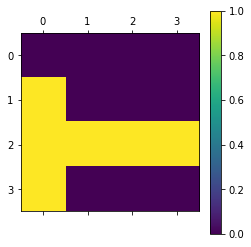

Neuron guesses T with a = 1.00


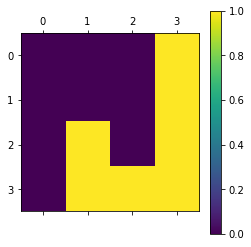

Neuron guesses J with a = 0.00


In [63]:
neuron_combo.printwb()
rand_list = random.sample(range(0, len(X_set)),2)
test_neuron(neuron_combo,rand_list)